In [7]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime
from citipy import citipy

In [8]:
# Create a set of random latitude and longitude combinations.
# Zip function iterates through two or more lists and combines an element from
# each list per iteration to create a new list of combined elements
# in this exmaple we are building a list of coordinates. They do this based
# on index, and builds the elements from the same indeces into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-57.4591651433284 83.3455847378359
-34.92519207952905 -1.897179792125712
30.14308799596587 -48.39451410251809
-82.25897876554507 117.38630810724709
50.027580566612215 38.028927888279696
-12.40320629919826 30.34471561733281
-66.68615356651347 71.03041993816714
47.573771073858154 36.03695962769106
72.32319547148722 121.00038985268708
30.62775311122526 -32.71252150518103
-41.048326867405414 -14.280166474095466
18.713089000282082 -93.53522305950345
-19.934869387782058 -15.63333010625064
-0.7366930568442172 -11.126690448029109
11.60005465557606 60.57058270627883
67.68062747556581 135.35564519059074
0.7844847153636607 -179.46786107013662
81.9102711020007 160.25780355226902
-0.011395332015254667 123.53133036757612
-41.12467907617062 -138.60666539743255
-1.0521742967131615 118.01061230978081
47.48415174266012 166.83517476761995
-76.93998936131258 -65.90421724408554
14.052492436916069 -178.16332742666594
55.77329522543093 -177.4175113824035
-35.13514790515359 -148.2077318981894
-16.301757845503

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [15]:
# Make an empty list to hold weather data
city_data = []
# Print the beginning of logging
print("Beginning Data Retrieval")
print("------------------------")

# Establish counters
record_count = 1
set_count = 1
# Build the city URL for the endpoint data you are trying to gather (what
# the backend will send you as a response)
# Loop through all the cities in the list. 

# QUALITY SEARCH A LOT OF DATA: Lets say we have a list of names, all the 
# student names from OU, and we are trying to find Stephanie Garrett out of 
# 20k students. student_list = [0,1,...20,000]. It doesn't make sense to
# iterate through the entirety of the students, because you may be close to the 
# start or the end. So we take the whole size of the array and divide it in half
# effectively splitting the array. So then we have a left array, and a right
# array. And we iterate as fast as we can through each one of these. Lets say the 
# goal index is i=11,430. It won't be in the first iteration, which stops at
# 10,000. It will move to the second iteration and then that will form two 
# smaller branches to iterate through (10,001-15,000) and (15,001-20,000). 
# This is the most effective way of iterating through data to ensure that processes
# are quick.


for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | urazovo
Processing Record 6 of Set 1 | serenje
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | mala tokmachka
Processing Record 9 of Set 1 | zhigansk
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | paraiso
Processing Record 13 of Set 1 | harper
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | batagay
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | gorontalo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | samarinda
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | ushuaia
Processing Re

Processing Record 39 of Set 4 | manuk mangkaw
Processing Record 40 of Set 4 | parana
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | garowe
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | nemuro
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | sisimiut
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | nouadhibou
Processing Record 2 of Set 5 | anloga
Processing Record 3 of Set 5 | luchow
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | shelburne
Processing Record 6 of Set 5 | olafsvik
Processing Record 7 of Set 5 | marawi
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 5 | gillette
Processing Record 10 of Set 5 | nuuk
Processing Record 11 of Set 5 | taolanaro
City not

Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 8 | ayan
Processing Record 34 of Set 8 | ihosy
Processing Record 35 of Set 8 | beitbridge
Processing Record 36 of Set 8 | berwick
Processing Record 37 of Set 8 | aguimes
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | tezu
Processing Record 40 of Set 8 | sindor
Processing Record 41 of Set 8 | wiesmoor
Processing Record 42 of Set 8 | zyryanka
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | andenes
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | nara
Processing Record 48 of Set 8 | beloha
Processing Record 49 of Set 8 | bafoulabe
Processing Record 50 of Set 8 | sattahip
Processing Record 1 of Set 9 | ngukurr
City not found. Skipping...
Processing Record 2 of Set 9 | rumoi
Processing Record 3 of Set 9 | aluksne
Processing Record 4 of Set

Processing Record 15 of Set 12 | mehamn
Processing Record 16 of Set 12 | savannah bight
Processing Record 17 of Set 12 | abbeville
Processing Record 18 of Set 12 | aitape
Processing Record 19 of Set 12 | arrecife
Processing Record 20 of Set 12 | belyy yar
Processing Record 21 of Set 12 | huayang
Processing Record 22 of Set 12 | jiazi
Processing Record 23 of Set 12 | manokwari
Processing Record 24 of Set 12 | acajutla
Processing Record 25 of Set 12 | snezhnogorsk
Processing Record 26 of Set 12 | kulhudhuffushi
Processing Record 27 of Set 12 | gat
Processing Record 28 of Set 12 | windhoek
Processing Record 29 of Set 12 | warin chamrap
Processing Record 30 of Set 12 | poindimie
Processing Record 31 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 32 of Set 12 | vostok
Processing Record 33 of Set 12 | hokitika
Processing Record 34 of Set 12 | amapa
Processing Record 35 of Set 12 | monclova
Processing Record 36 of Set 12 | beringovskiy
Processing Record 37 of Set 12 | r

In [26]:
print(len(city_data))

563


In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,74.14,47,1,10.02,AU,2022-12-19 00:02:02
1,Luderitz,-26.6481,15.1594,64.74,85,0,13.67,NA,2022-12-18 23:59:37
2,Saint George,37.1041,-113.5841,46.26,36,36,4.00,US,2022-12-19 00:00:00
3,Albany,42.6001,-73.9662,31.41,76,42,8.99,US,2022-12-18 23:59:46
4,Urazovo,50.0836,38.0395,27.97,75,99,13.20,RU,2022-12-19 00:02:04
5,Serenje,-13.2325,30.2352,61.54,95,99,2.80,ZM,2022-12-19 00:02:04
6,Saint-Philippe,-21.3585,55.7679,76.59,82,79,12.50,RE,2022-12-19 00:02:05
7,Mala Tokmachka,47.5356,35.8929,27.84,71,87,12.12,UA,2022-12-19 00:02:05
8,Zhigansk,66.7697,123.3711,-21.21,91,100,11.72,RU,2022-12-19 00:02:05
9,Ribeira Grande,38.5167,-28.7000,60.78,89,52,8.99,PT,2022-12-19 00:02:06


In [49]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

new_df = new_df[new_column_order]
new_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-12-19 00:02:02,-33.6500,115.3333,74.14,47,1,10.02
1,Luderitz,NA,2022-12-18 23:59:37,-26.6481,15.1594,64.74,85,0,13.67
2,Saint George,US,2022-12-19 00:00:00,37.1041,-113.5841,46.26,36,36,4.00
3,Albany,US,2022-12-18 23:59:46,42.6001,-73.9662,31.41,76,42,8.99
4,Urazovo,RU,2022-12-19 00:02:04,50.0836,38.0395,27.97,75,99,13.20
...,...,...,...,...,...,...,...,...,...
558,Bartica,GY,2022-12-19 00:17:04,6.4000,-58.6167,77.32,98,100,2.01
559,Romanovo,RU,2022-12-19 00:17:05,52.6182,81.2271,1.29,96,100,7.18
560,Wamba,NG,2022-12-19 00:17:05,8.9333,8.6000,71.67,20,79,4.99
561,Gambiran,ID,2022-12-19 00:17:06,-6.7988,111.4951,77.85,83,1,4.18


In [50]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

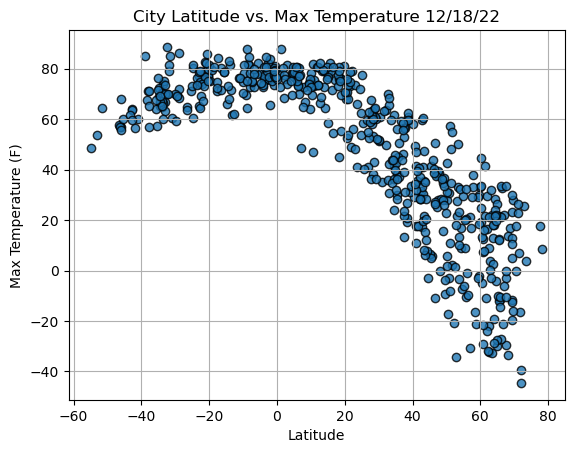

In [48]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

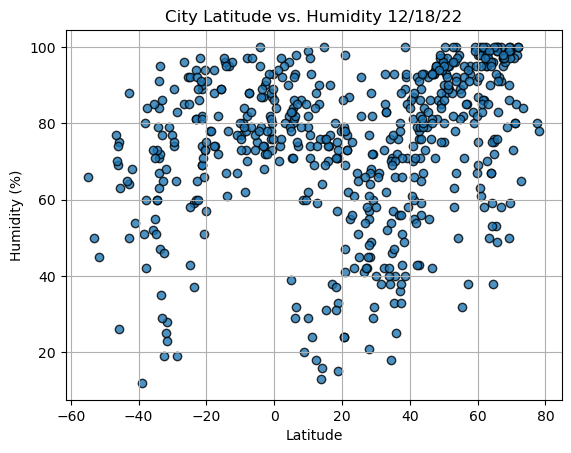

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

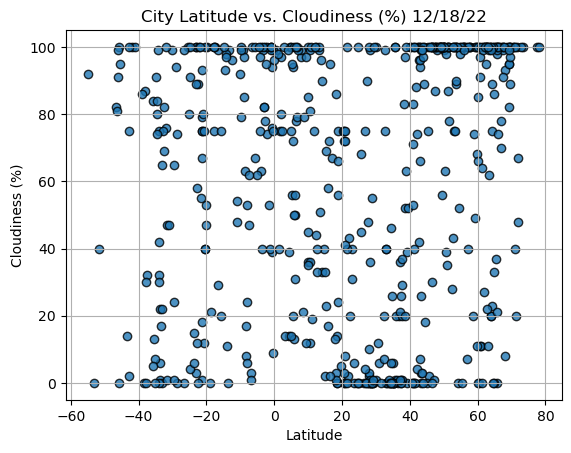

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

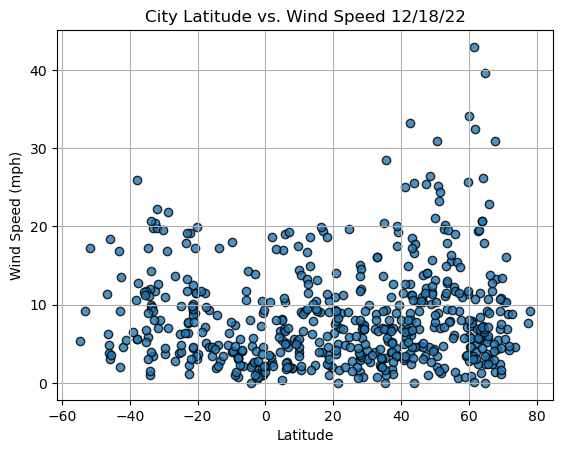

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()